****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
# Problem 1: Find the 10 countries with most projects

import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import numpy as np

# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

# load as dict
json_dict = json.load(open('data/world_bank_projects.json'))
#json_normalize(json_dict, 'projectdocs')

In [2]:
# Exploring Data
json_df.info()
json_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [3]:
# Use groupby method on countryname, sort the series by descending, and print the top 10 to show answer to #1
country_project_df = json_df.groupby(json_df.countryname).size().sort_values(ascending=False)
country_project_df.head(10)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

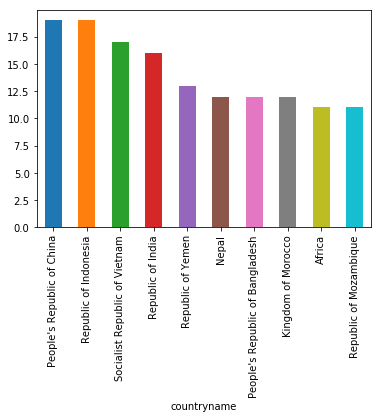

In [4]:
country_project_df.head(10).plot(kind='bar', x='countryname')
plt.show()

In [5]:
# Problem 2: Find the top 10 major project themes (using column 'mjtheme_namecode')
themes = json_df.mjtheme_namecode
names_df = pd.DataFrame()
# Creating a new dataframe from 'mjtheme_namecode'
for i in range(themes.count()):
    names_df = names_df.append(pd.DataFrame.from_dict(themes[i]), ignore_index=True)
                    
names_df

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [6]:
#Solution to number 2 if including the blank name and grouped by name
grouped_names = names_df.groupby(names_df.name).size().sort_values(ascending=False)
grouped_names.head(10)

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64

In [7]:
# Solution to number 2 if excluding the blank name and grouped by both name and code
grouped_names_code = names_df.groupby(['name','code']).size().sort_values(ascending=False)
grouped_names_code.head(10)


name                                          code
Environment and natural resources management  11      223
Rural development                             10      202
Human development                             8       197
Public sector governance                      2       184
Social protection and risk management         6       158
Financial and private sector development      4       130
Social dev/gender/inclusion                   7       119
Trade and integration                         5        72
Urban development                             9        47
Economic management                           1        33
dtype: int64

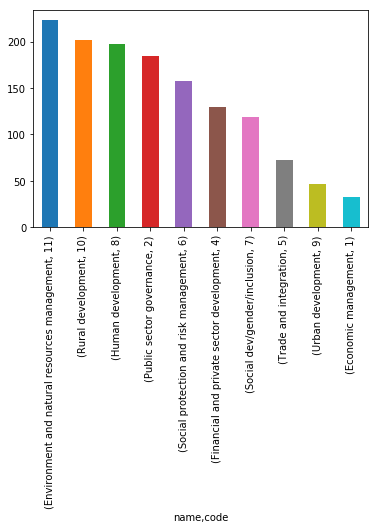

In [12]:
#Plot of the top 10 project themes
grouped_names_code.head(10).plot(kind='bar', x='name')
plt.show()

In [9]:
# Problem 3: In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

#Create a dictionary with all key value pairs for code:name

names_df['name'].replace('', np.nan, inplace=True)

new_dict = {k:list(names_df[k].unique()) for k in names_df.columns}
new_dict
#This incorrectly assigned the blank or NaN to code 11.


{'code': ['8', '11', '1', '6', '5', '2', '7', '4', '10', '9', '3'],
 'name': ['Human development',
  nan,
  'Economic management',
  'Social protection and risk management',
  'Trade and integration',
  'Public sector governance',
  'Environment and natural resources management',
  'Social dev/gender/inclusion',
  'Financial and private sector development',
  'Rural development',
  'Urban development',
  'Rule of law']}

In [10]:
# In order to fix our dictionary, we will drop the NaNs and create another dictionary
drop_blanks_df = names_df.dropna()
new_dict = {k:list(drop_blanks_df[k].unique()) for k in drop_blanks_df.columns}

corrected_dict = {k:v for (k,v) in zip(list(new_dict.values())[0], list(new_dict.values())[1])}
corrected_dict


{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [11]:
#Map the correct dictionary to the name column of the df to resolve NaN issue
names_df['name'] = names_df['code'].map(corrected_dict)
names_df

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion
